# NLP Movie Genre Classification - Logistic Regression Modelling Part 2

by Andrew Alarcon

## Introduction

In this notebook, I will be creating Logistic Regression models on the data set that excludes the genres `game show`, `war`, and `news`. My main focus is to create a model that reduces the dimensions of the data using PCA.

## Importing the Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import nltk
import re
import time

In [25]:
X_train = pd.read_csv('data/data_new/X_train_new.csv')
X_test = pd.read_csv('data/data_new/X_test_new.csv')

y_train = pd.read_csv('data/data_new/y_train_new.csv')
y_test = pd.read_csv('data/data_new/y_test_new.csv')

In [26]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Turning 1-D column vector into an 1-D array
y_train = y_train.ravel()
y_test = y_test.ravel()

## Scaling the Data

In [27]:
abs_scaler = MaxAbsScaler()
abs_scaler.fit(X_train)

X_train_scaled_abs = abs_scaler.transform(X_train)
X_test_scaled_abs = abs_scaler.transform(X_test)

## Logistic Regression

In [28]:
# Instantiate and fit
logit = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42, C=10)

logit.fit(X_train_scaled_abs, y_train)

# Getting accuracy scores
logit_train = logit.score(X_train_scaled_abs, y_train)
logit_test = logit.score(X_test_scaled_abs, y_test)

print('Training accuracy for PCA:', logit_train)
print('Testing accuracy for PCA:', logit_test)

Training accuracy for PCA: 0.5150206165324955
Testing accuracy for PCA: 0.49867478158437223


Very interesting! With 3 genre's dropped from the dataset, the training and testing scores are equal to the optimal Logistic Regression model I had in the previous notebook. Let me now compare the performance of this model with a PCA version.

## Logistic Regression PCA

In [9]:
my_pca = PCA()
my_pca.fit(X_train_scaled_abs)

# Transform the data
X_train_PCA = my_pca.transform(X_train_scaled_abs)
X_test_PCA = my_pca.transform(X_test_scaled_abs)

In [10]:
my_pca.explained_variance_ratio_

array([0.01685568, 0.01123415, 0.00970635, 0.00939209, 0.0088455 ,
       0.00828726, 0.0081248 , 0.00788164, 0.00775957, 0.0074962 ,
       0.00740952, 0.00726999, 0.0071743 , 0.0069743 , 0.00694703,
       0.00672485, 0.00668814, 0.00653314, 0.00647948, 0.0063001 ,
       0.00624188, 0.0061642 , 0.00612354, 0.00605228, 0.00595323,
       0.00590525, 0.00580943, 0.00573716, 0.0057173 , 0.00561219,
       0.00556222, 0.00548632, 0.00544679, 0.00535782, 0.00527566,
       0.00522488, 0.00519005, 0.00513886, 0.00511489, 0.00507517,
       0.00505377, 0.00501766, 0.00494795, 0.00490169, 0.00485196,
       0.00484261, 0.00481191, 0.00477971, 0.00474385, 0.00469336,
       0.00466887, 0.00460529, 0.00459685, 0.00454878, 0.00453421,
       0.00449014, 0.00446671, 0.00442513, 0.00442054, 0.00437175,
       0.00436749, 0.00434226, 0.00431247, 0.00429814, 0.00426095,
       0.00426027, 0.00420974, 0.00419309, 0.00417346, 0.00416132,
       0.00413383, 0.00409319, 0.00407414, 0.00404546, 0.00403

In [11]:
print(f"Variance captured by PC1: {my_pca.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_pca.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_pca.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_pca.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  0.018
Variance captured by PC2:  0.012
Proportion of variance captured by PC1:  0.017
Proportion of variance captured by PC2:  0.011


In [12]:
# Pull out the explained variance ratio
expl_var = my_pca.explained_variance_ratio_

# Calculate the cumulative sum of this array
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.01685568, 0.02808983, 0.03779618, 0.04718827, 0.05603378,
       0.06432104, 0.07244584, 0.08032748, 0.08808705, 0.09558324,
       0.10299276, 0.11026275, 0.11743706, 0.12441136, 0.13135839,
       0.13808323, 0.14477137, 0.15130451, 0.157784  , 0.1640841 ,
       0.17032597, 0.17649017, 0.18261371, 0.18866599, 0.19461922,
       0.20052447, 0.2063339 , 0.21207106, 0.21778836, 0.22340055,
       0.22896277, 0.2344491 , 0.23989588, 0.2452537 , 0.25052936,
       0.25575425, 0.26094429, 0.26608315, 0.27119804, 0.27627321,
       0.28132698, 0.28634464, 0.2912926 , 0.29619429, 0.30104625,
       0.30588886, 0.31070077, 0.31548048, 0.32022433, 0.32491768,
       0.32958655, 0.33419185, 0.3387887 , 0.34333748, 0.34787169,
       0.35236183, 0.35682854, 0.36125367, 0.36567421, 0.37004596,
       0.37441345, 0.37875571, 0.38306818, 0.38736633, 0.39162727,
       0.39588755, 0.40009729, 0.40429038, 0.40846384, 0.41262516,
       0.416759  , 0.42085219, 0.42492633, 0.42897178, 0.43300

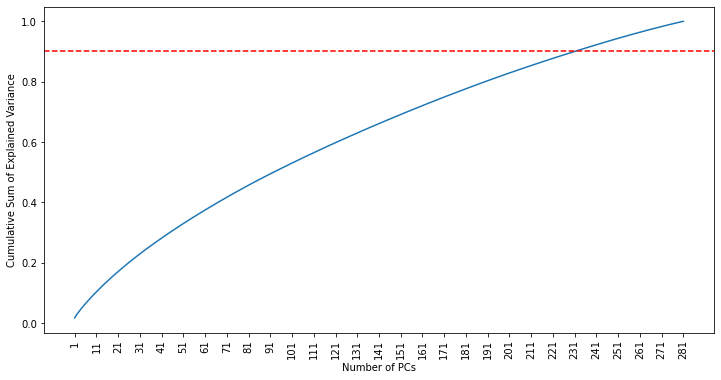

In [13]:
# Plot out the cumulative sum graph
plt.figure(figsize=(12, 6))
plt.plot(range(1,282), cumulative_sum) #282 because X_train has 282 columns
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,282,10))
plt.xticks(rotation = 90)
plt.show()

I want to keep 90% of the variance, so I'll set `n_components=.9`.

In [14]:
# Instantiate and fit
my_pca = PCA(n_components = .9)
my_pca.fit(X_train_scaled_abs)

# Transform train and test
X_train_PCA = my_pca.transform(X_train_scaled_abs)
X_test_PCA = my_pca.transform(X_test_scaled_abs)

In [15]:
print(f'Original: {X_train_scaled_abs.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (40744, 281)
PCA Transformed: (40744, 231)


In [18]:
training_scores = []
testing_scores = []


#values = [400, 800, 1200, 1600, 2000, 2400, 2672] Taking too long to run

c_range = np.array([.001,.1,1,10,50,100])

for value in c_range:

    # Instantiate and fit
    my_pca = PCA(n_components = .9)
    my_pca.fit(X_train_scaled_abs)

    # Transform train and test
    X_train_PCA = my_pca.transform(X_train_scaled_abs)
    X_test_PCA = my_pca.transform(X_test_scaled_abs)

    print(f'Working on the model with {value} as a C value', end='\r')
    # Do the same but fit on the PCA transformed data
    my_logreg_PCA = LogisticRegression(solver='lbfgs', max_iter=2000, C = value)

    # Fitting to PCA data
    my_logreg_PCA.fit(X_train_PCA, y_train) 

    # Scoring on PCA train and test sets
    training_scores.append(my_logreg_PCA.score(X_train_PCA, y_train))
    testing_scores.append(my_logreg_PCA.score(X_test_PCA, y_test))

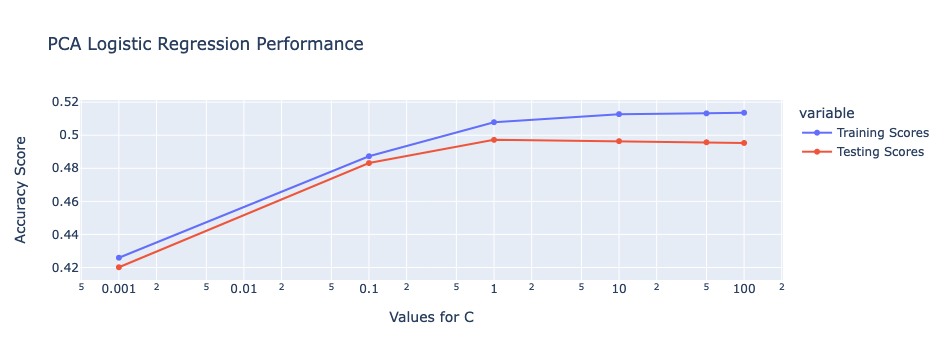

In [19]:
fig = px.line(title='PCA Logistic Regression Performance', x=c_range , y=[training_scores, testing_scores])

fig.update_traces(mode='markers+lines')

fig.update_xaxes(title_text="Values for C", type="log")
fig.update_yaxes(title_text="Accuracy Score")

fig.data[0].name="Training Scores"
fig.data[1].name="Testing Scores"
fig.update_traces(mode='markers+lines', showlegend=True)

fig.show()

Looking tat this chart, the gap between training and testing scores slowly increases as C increases. So, I will choose `C=1` since the score is higher than at .1, and the space between training and testing scores isn't as exaggerated as it is beyond `C=1`.

In [20]:
# Instantiate and fit
logit_pca = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42, C=1)

logit_pca.fit(X_train_PCA, y_train)

# Getting accuracy scores
logit_pca_train_acc = logit_pca.score(X_train_PCA, y_train)
logit_pca_test_acc = logit_pca.score(X_test_PCA, y_test)

print('Training accuracy for PCA:', logit_pca_train_acc)
print('Testing accuracy for PCA:', logit_pca_test_acc)

Training accuracy for PCA: 0.5038778715884548
Testing accuracy for PCA: 0.4951408658093649


In [30]:
y_pred = logit_pca.predict(X_test_PCA)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      action       0.26      0.07      0.11       238
   adventure       0.33      0.02      0.04       134
   animation       0.00      0.00      0.00        96
   biography       0.00      0.00      0.00        57
      comedy       0.43      0.42      0.43      1458
       crime       0.00      0.00      0.00        79
 documentary       0.60      0.83      0.69      2595
       drama       0.46      0.75      0.57      2465
      family       0.40      0.03      0.05       136
     fantasy       0.00      0.00      0.00        47
   game show       0.36      0.22      0.28        36
     history       0.00      0.00      0.00        46
      horror       0.38      0.22      0.28       407
       music       0.60      0.30      0.40       149
     musical       0.00      0.00      0.00        58
     mystery       0.00      0.00      0.00        54
        news       0.00      0.00      0.00        28
  reality tv       0.32    

/Users/andrewalarcon/opt/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/andrewalarcon/opt/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/andrewalarcon/opt/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



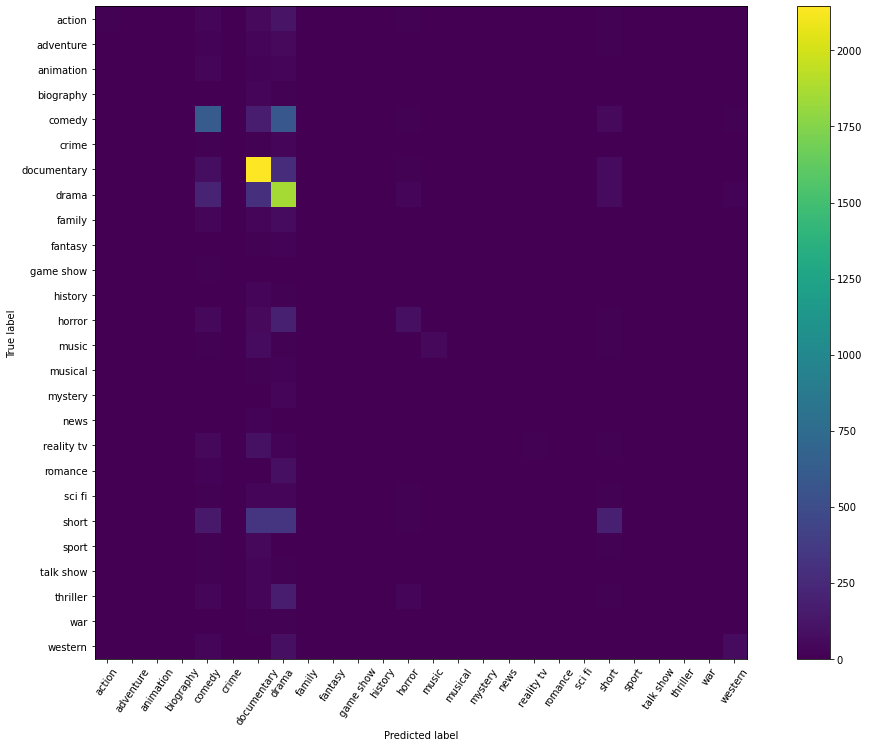

In [29]:
fig, ax = plt.subplots(figsize=(18, 12))
plot_confusion_matrix(logit_pca, X_test_PCA, y_test, cmap='viridis', ax=ax, xticks_rotation=55, include_values=False);

This model had a training accuracy of 50.4%, and a testing accuracy of 49.5%. Even after using less data, and reducing the dimensions of it, the accuracy scores are still very close to the PCA model we had in the previous notebook. Even though this model is technically performing worse in accuracy (the previous PCA model's training was 50.8% and testing was 49.7%), it is still very interesting to see such close accuracy scores when using much less information. 

As for precision and recall, much of the behavior is similar as well. Looking at `documentary`, the precision is .60, recall was .83, and the F1 score was .69. Here the recall actuall improved by .02! However, the recall and F1 score decreased by .01.

Taking a look at another genre, `drama` improved in its recall score by .01, landing at .75. However, the precision and F1 score remained the same at .46, and .57 respectively.

## Conclusion

In this notebook, I wanted to see how the performance of Logistic Regression would change when using a dataset that had genres with not enough information dropped. The reason for dropping this information was because it might not have had enough information for the model to efficiently learn from.

After running this data on a PCA Logistic Regression model, the performance in accuracy was less than the previous PCA model, altough very close. Similar results are present in the classification report, where many values are close to the values present in the previous PCA model.

In the next notebook, I will be running a Random Forest Classifier on the data and measuring its performance.
